In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
job_postings = pd.read_csv('fake_job_postings.csv')

In [3]:
job_postings.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

<AxesSubplot:>

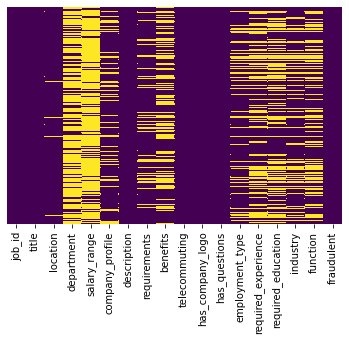

In [4]:
sns.heatmap(job_postings.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
pre_split = pd.DataFrame(job_postings[['description','has_company_logo','has_questions','fraudulent']])

In [6]:
pre_split.dropna(inplace=True)

In [7]:
import string
from nltk.corpus import stopwords
def text_process(mess):
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [8]:
from sklearn.model_selection import train_test_split
feature_train, feature_test, fraud_train, fraud_test = train_test_split(pre_split.drop('fraudulent',axis=1), pre_split['fraudulent'], test_size=0.2)

In [9]:
feature_train.reset_index(inplace=True,drop=True)
feature_test.reset_index(inplace=True,drop=True)
fraud_train.reset_index(inplace=True,drop=True)
fraud_train.reset_index(inplace=True,drop=True)

In [10]:
feature_train['description'].apply(text_process)
feature_test['description'].apply(text_process)

0       [Customer, Service, Technical, Specialist, bas...
1       [Miller, amp, Associates, looking, Business, A...
2       [fast, paced, fun, exciting, place, work, summ...
3       [Farmigo, hiring, Regional, Organizing, Direct...
4       [seeking, individuals, connected, companies, h...
                              ...                        
3571    [Internet, Writer, shall, properly, complete, ...
3572    [Normal, 0, Titan, Business, Properties, TBP, ...
3573    [Leading, fashion, luxury, amp, lifestyle, com...
3574    [Receptionist, based, Burbank, CA, right, cand...
3575    [PROSPER, DANCE, FORCE, seeking, fill, front, ...
Name: description, Length: 3576, dtype: object

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
train_tfidf_features = vectorizer.fit_transform(feature_train['description']).toarray()
test_tfidf_features = vectorizer.transform(feature_test['description']).toarray()

In [12]:
train_tfidf = pd.DataFrame(train_tfidf_features)
test_tfidf = pd.DataFrame(test_tfidf_features)
train_features = pd.merge(train_tfidf,feature_train.drop('description',axis=1),left_index=True, right_index=True)
test_features = pd.merge(test_tfidf,feature_test.drop('description',axis=1),left_index=True, right_index=True)

In [13]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(train_features,fraud_train)

RandomForestClassifier()

In [14]:
from sklearn.metrics import classification_report,confusion_matrix
predictions = model.predict(test_features)
print(classification_report(fraud_test,predictions))
print("\n")
print(confusion_matrix(fraud_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3400
           1       1.00      0.53      0.70       176

    accuracy                           0.98      3576
   macro avg       0.99      0.77      0.84      3576
weighted avg       0.98      0.98      0.97      3576



[[3400    0]
 [  82   94]]


In [160]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

pipeline = Pipeline([
    ('bag', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB()),
])

In [161]:
pipeline.fit(describe_train,fraud_train)

Pipeline(steps=[('bag',
                 CountVectorizer(analyzer=<function text_process at 0x000002670BC01D30>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [162]:
predictions = pipeline.predict(describe_test)

In [165]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(fraud_test,predictions))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3418
           1       1.00      0.03      0.05       158

    accuracy                           0.96      3576
   macro avg       0.98      0.51      0.51      3576
weighted avg       0.96      0.96      0.94      3576



In [166]:
print(confusion_matrix(fraud_test,predictions))

[[3418    0]
 [ 154    4]]
